# Visualize Financial Market Data with Matplotlib, Seaborn and Plotly Dash

In this chapter, following recipes are presented:
1. quickly visualizing data using pandas
2. animating evolution of the yield curve using matplotlib 
3. plotting options implied volatility surfaces with matplotlib
4. visualizing statistical relationships with Seaborn 
5. creating an interactive PCA analytics dashboard with Plotly Dash 

### Quickly visualizing data with pandas

In [1]:
# pandas offers various "backends" that are used while plotting through a common method
# in this recipe we'll use default backend "matplotlib" to quickly plot financial data

In [2]:
import matplotlib as plt
import pandas as pd
from openbb import obb
from pandas.plotting import bootstrap_plot, scatter_matrix
obb.user.preferences.output_type = "dataframe"

Extensions to add: alpha_vantage@1.3.3, biztoc@1.3.3, cboe@1.3.3, ecb@1.3.3, econometrics@1.4.3, finra@1.3.3, finviz@1.2.3, government_us@1.3.3, multpl@1.0.3, nasdaq@1.3.3, openbb_charting@2.2.3, quantitative@1.3.3, seeking_alpha@1.3.3, stockgrid@1.3.3, technical@1.3.3, tmx@1.2.3, tradier@1.2.3, wsj@1.3.3

Building...


In [3]:
df = obb.equity.price.historical("AAPL")

In [4]:
df.head()

,open,high,low,close,volume
date,,,,,
2004-01-02,0.39,0.39,0.38,0.38,2024993600
2004-01-05,0.38,0.40,0.38,0.40,5530257600
2004-01-06,0.40,0.40,0.39,0.40,7130872000
2004-01-07,0.40,0.41,0.39,0.41,8216241600
2004-01-08,0.41,0.42,0.41,0.42,6444244800


<Axes: xlabel='date'>

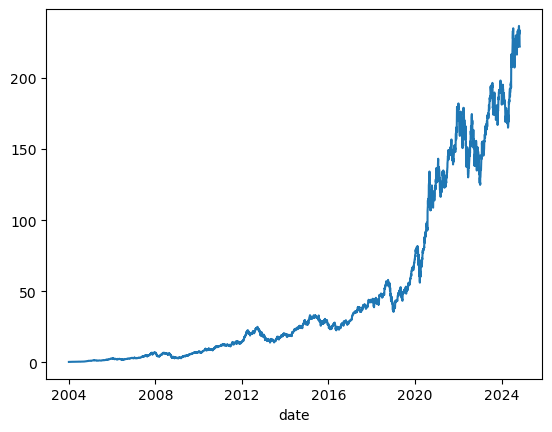

In [5]:
# let's say we want to create a line chart that plots the closing price
df.close.plot()

In [12]:
# we can plot the daily returns as a bar chart using additional styling options
returns = df.close.pct_change()
type(returns)
returns.index

Index([2004-01-02, 2004-01-05, 2004-01-06, 2004-01-07, 2004-01-08, 2004-01-09,
       2004-01-12, 2004-01-13, 2004-01-14, 2004-01-15,
       ...
       2024-10-22, 2024-10-23, 2024-10-24, 2024-10-25, 2024-10-28, 2024-10-29,
       2024-10-30, 2024-10-31, 2024-11-01, 2024-11-04],
      dtype='object', name='date', length=5249)

<Axes: title={'center': 'AAPL returns'}, xlabel='date'>

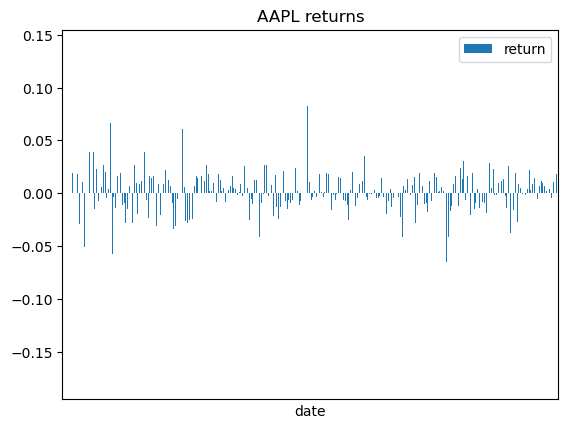

In [13]:
returns.name = "return"
returns.plot.bar(
    title="AAPL returns",
    grid=False,
    legend=True,
    xticks=[])

<Axes: ylabel='Frequency'>

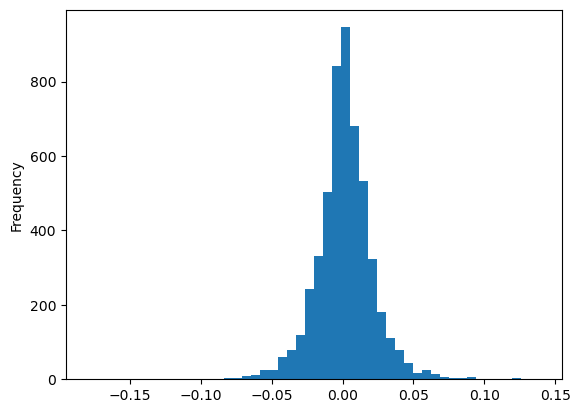

In [14]:
# we can create a histogram of returns with 50 bins
returns.plot.hist(bins=50)

<Axes: >

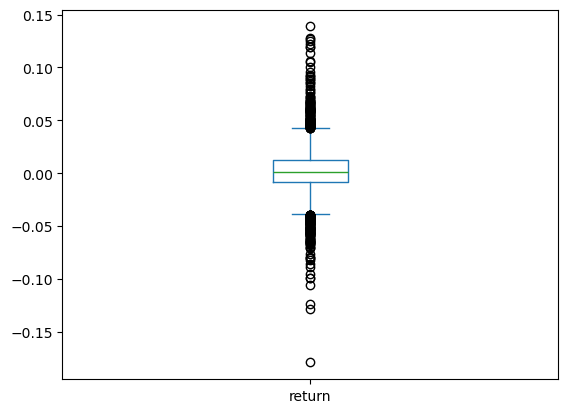

In [16]:
# box-and-whisker plot
returns.plot.box()
# data points beyond whiskers are considered outliers

In [17]:
# The pandas plot method lets you create various types of plots using DataFrames and Series. 
# Under the hood, pandas use the defined backend (Matplotlib by default) to generate these visualizations.

<Axes: xlabel='QQQ', ylabel='AAPL'>

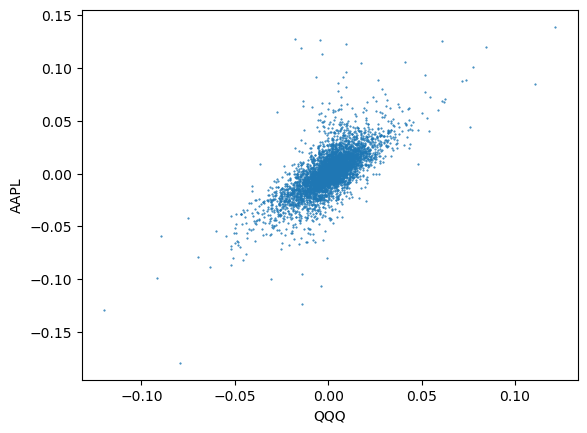

In [18]:
# scatter plots are a type of visual representation that can be used when assessing relationship between two assets
# we want to compare AAPL with the Nasdaq tracking ETF, QQQ
qqq = obb.equity.price.historical("QQQ")
qqq_returns = qqq.close.pct_change()
asset_bench = pd.concat([returns, qqq_returns], axis=1)
asset_bench.columns = ["AAPL", "QQQ"]
asset_bench.plot.scatter(x="QQQ", y="AAPL", s=0.25)

In [19]:
# pandas scatter matrix -> visualizes pairwise relationships. 
# It generates a matrix of scatter plots, each plotting a pair of columns against each other
asset_bench.head()

,AAPL,QQQ
date,,
2004-01-02,NaN,NaN
2004-01-05,0.052632,0.020077
2004-01-06,0.000000,0.006740
2004-01-07,0.025000,0.009106
2004-01-08,0.024390,0.007962


array([[<Axes: xlabel='AAPL', ylabel='AAPL'>,
        <Axes: xlabel='QQQ', ylabel='AAPL'>],
       [<Axes: xlabel='AAPL', ylabel='QQQ'>,
        <Axes: xlabel='QQQ', ylabel='QQQ'>]], dtype=object)

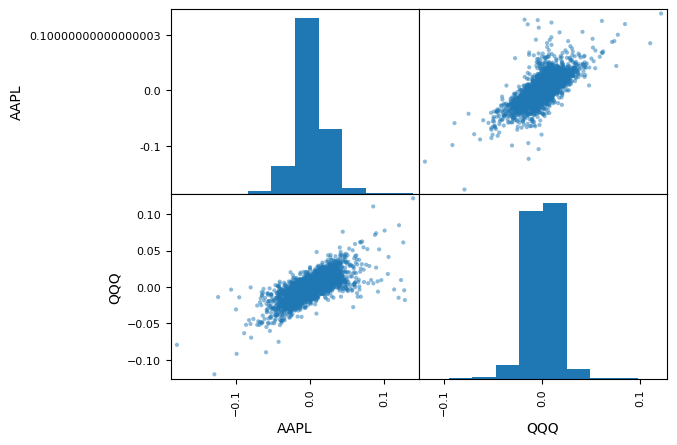

In [21]:
scatter_matrix(asset_bench) # the main diagonal (top left -> bottom right) shows histogram of each column

Bootstrap plots serve to graphically evaluate the variability associated with a particular statistic, including the mean, median, and midrange. A designated subset size is randomly sampled from the data set, and the target statistic is calculated for this subset. This procedure is iteratively performed a predetermined number of times. The plots and histograms collectively form the bootstrap plot.

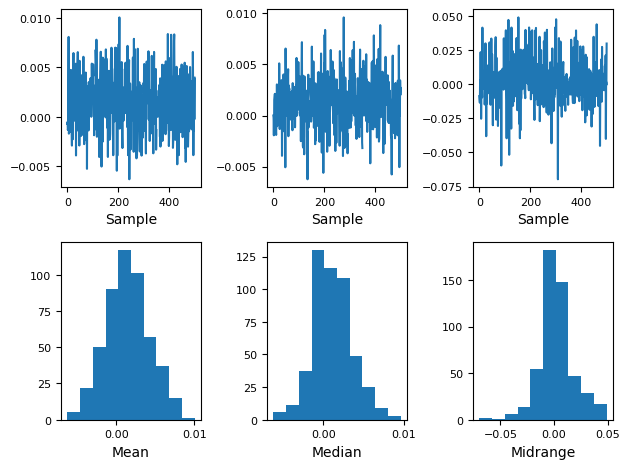

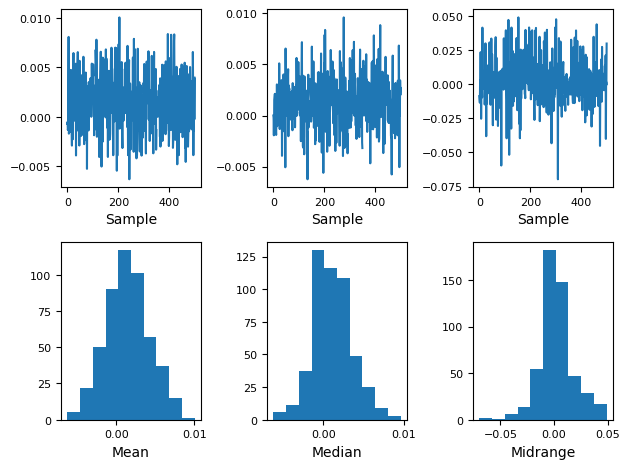

In [22]:
bootstrap_plot(returns)

# Animating the evolution of the yield curve with Matplotlib

The yield curve charts the yields of bonds of the same quality across different maturities, typically slopes upwards. This means that longer term bonds have higher yields than shorter term bonds, which makes sense given the additional risk associated with holding a bond for a longer time (inflation, interest rate volatility). 

It should be noted that there are times when the yield curve inversts, meaning the shorter term maturities yield more than long term ones. Many view inverted yield curve as a precursor to recession.

In [2]:
# Creating an animated plot requires a specialized function called animation which is imported from Matplotlib

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from openbb import obb
obb.user.preferences.output_type = "dataframe"

In [4]:
# Creating list of maturities and downloading the data
maturities = ["3m", "6m", "1y", "2y", "3y", "5y", "7y", "10y", "30y"]
data = obb.fixedincome.government.treasury_rates(
    start_date="1985-01-01",
    provider="federal_reserve",
).dropna(how="all").drop(columns=["month_1", "year_20"])
data.columns = maturities

In [5]:
data.head()

,3m,6m,1y,2y,3y,5y,7y,10y,30y
date,,,,,,,,,
1985-01-02,0.0810,0.0862,0.0919,0.1003,0.1061,0.1122,0.1168,0.1170,0.1169
1985-01-03,0.0807,0.0862,0.0917,0.1006,0.1055,0.1113,0.1154,0.1162,0.1164
1985-01-04,0.0808,0.0861,0.0917,0.1008,0.1062,0.1119,0.1161,0.1167,0.1170
1985-01-07,0.0806,0.0851,0.0903,0.1001,0.1050,0.1109,0.1141,0.1150,0.1153
1985-01-08,0.0806,0.0848,0.0904,0.0999,0.1048,0.1104,0.1136,0.1145,0.1149


In [6]:
# we can use boolean indexing to mark where the yield curve is inverted
data["inverted"] = data["30y"] < data["3m"]

In [7]:
data.head()

,3m,6m,1y,2y,3y,5y,7y,10y,30y,inverted
date,,,,,,,,,,
1985-01-02,0.0810,0.0862,0.0919,0.1003,0.1061,0.1122,0.1168,0.1170,0.1169,False
1985-01-03,0.0807,0.0862,0.0917,0.1006,0.1055,0.1113,0.1154,0.1162,0.1164,False
1985-01-04,0.0808,0.0861,0.0917,0.1008,0.1062,0.1119,0.1161,0.1167,0.1170,False
1985-01-07,0.0806,0.0851,0.0903,0.1001,0.1050,0.1109,0.1141,0.1150,0.1153,False
1985-01-08,0.0806,0.0848,0.0904,0.0999,0.1048,0.1104,0.1136,0.1145,0.1149,False


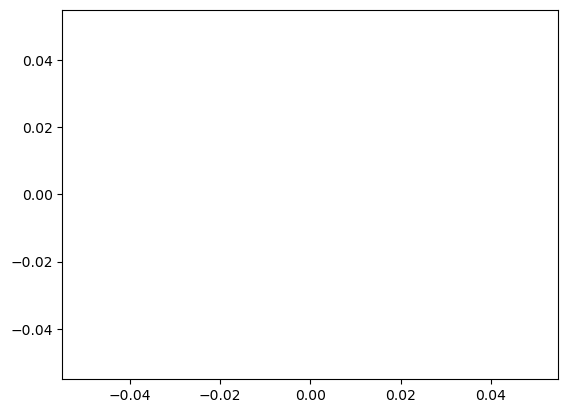

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot([], [])

In [11]:
# set the range of ticks
ax.set_xlim(0, 8)
ax.set_ylim(0, 20)

(0.0, 20.0)

In [13]:
ax.set_xticks(range(9))
ax.set_yticks([2, 4, 6, 8, 10, 12, 14, 16, 18])

In [14]:
ax.set_xticklabels(maturities)
ax.set_yticklabels([2, 4, 6, 8, 10, 12, 14, 16, 18])

[Text(0, 2, '2'),
 Text(0, 4, '4'),
 Text(0, 6, '6'),
 Text(0, 8, '8'),
 Text(0, 10, '10'),
 Text(0, 12, '12'),
 Text(0, 14, '14'),
 Text(0, 16, '16'),
 Text(0, 18, '18')]

In [15]:
ax.yaxis.set_label_position("left")
ax.yaxis.tick_left()

Text(0.5, 1.0, 'U.S. Treasury Bond Yield Curve')

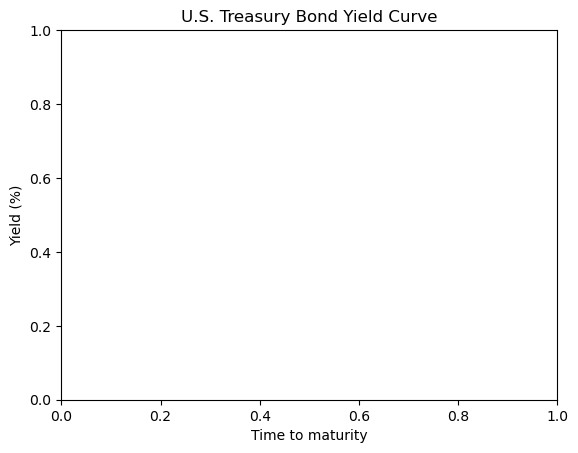

In [16]:
plt.ylabel("Yield (%)")
plt.xlabel("Time to maturity")
plt.title("U.S. Treasury Bond Yield Curve")

In [17]:
# Create the function that is run when the animation is initialized:
def init_func():
    line.set_data([], [])
    return line,

In [19]:
def animate(i):
    x = range(0, len(maturities))
    y = data[maturities].iloc[i]
    dt_ = data.index[i].strftime("%Y-%m-%d")
    if data.inverted.iloc[i]:
            line.set_color("r")
    else:
        line.set_color("y")
    line.set_data(x, y)
    plt.title(f"U.S. Treasury Bond Yield Curve ({dt_})")
    return line,

In [20]:
ani = animation.FuncAnimation(
    fig,
    animate,
    init_func=init_func,
    frames=len(data.index),
    interval=250,
    blit=True
)

In [22]:
plt.show()